In [1]:
import json
import collections
import matplotlib.pyplot as plt
import numpy as np
import re
from wordcloud import WordCloud 
import pandas as pd

In [2]:
with open('data/processed_trumptwitterarchive.txt', 'r') as data_file:
    json_data = data_file.read()

data = json.loads(json_data)

print("Dataset contains " + str(len(data)) + " twitters")

Dataset contains 42692 twitters


1 Impact Analysis

We are curious to see the social impact of Donald's Twitter and how his followers response to his posts. 

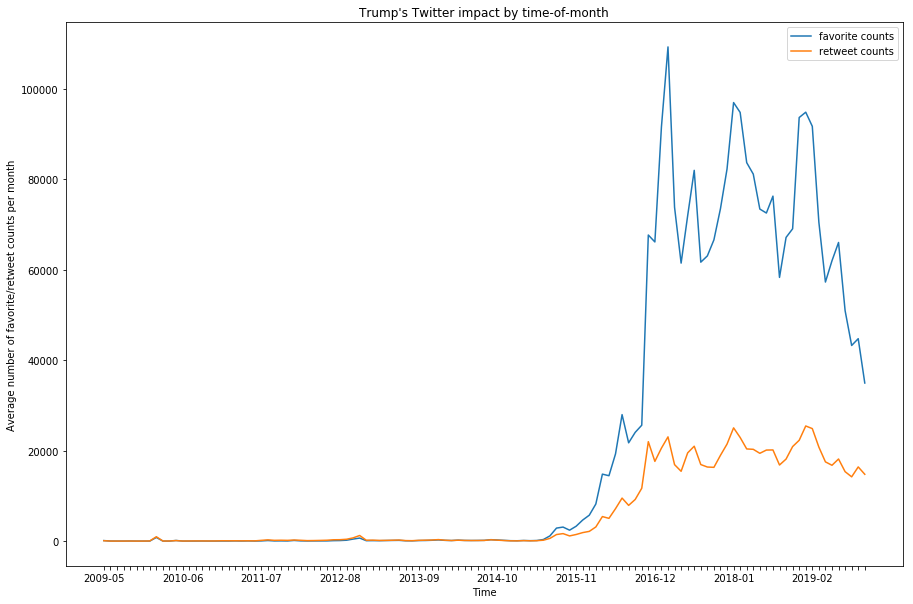

In [3]:
# measure the impact of Trump's Twitter over time

month2num = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '05', 'May': '05', 'Jun': '06',
             'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

def convert2year_month(gmt_time_stamp):
    time_parts = gmt_time_stamp.split(" ")    
    return time_parts[5] + '-' + month2num[time_parts[1]]

month2retweet_counts = {}
month2favorite_counts = {}

for twitter in data:
    month = convert2year_month(twitter['created_at'])
    if month not in month2retweet_counts:
        month2retweet_counts[month] = []
    month2retweet_counts[month].append(twitter['retweet_count'])
    
    if month not in month2favorite_counts:
        month2favorite_counts[month] = []
    month2favorite_counts[month].append(twitter['favorite_count'])
    
month2avg_retweets = {}
for month in month2retweet_counts:
    month2avg_retweets[month] = np.mean(month2retweet_counts[month])

month2avg_favorites = {}
for month in month2favorite_counts:
    month2avg_favorites[month] = np.mean(month2favorite_counts[month])
    
months = [m for m in month2retweet_counts.keys()]
months.sort()
avg_favorites = [month2avg_favorites[m] for m in months]
avg_retweets = [month2avg_retweets[m] for m in months]

months_ticks = [months[i] if i % 12 == 0 else '' for i in range(len(months))]

x_pos = np.arange(len(months))

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(x_pos, avg_favorites, label="favorite counts")
ax.plot(x_pos, avg_retweets, label="retweet counts")

ax.set_xticks(x_pos)
ax.set_xticklabels(months_ticks)

ax.set_xlabel('Time')
ax.set_ylabel('Average number of favorite/retweet counts per month')
ax.set_title('Trump\'s Twitter impact by time-of-month')
ax.legend()

plt.savefig("Trump_impact_by_month.jpeg", dpi=200)
plt.show()

In [4]:
# find the most impactful twitter of Trump
data_econ = pd.read_csv('data/all_cleaned_SPX_data.csv')
data_econ['datetime'] = pd.to_datetime(data_econ['datetime'])
df_econ = data_econ[['datetime', 'close']]

time2smp500 = {}
for index, row in df_econ.iterrows():
    # last row
    if index + 1 == len(df_econ):
        break
    next_row = df_econ.iloc[index + 1]
    time2smp500[str(row['datetime'])] = (float(row['close']), float(next_row['close']))

In [5]:
def convertTimeStamp(gmt_time_stamp):
    time_parts = gmt_time_stamp.split(" ")
    date_str = time_parts[5] + '-' + month2num[time_parts[1]] + '-' + time_parts[2]
    time_str = time_parts[3]
    
    return date_str + ' ' + time_str

def truncateTimestamp(gmt_time_stamp):
    time_parts = gmt_time_stamp.split(" ")
    date_str = time_parts[5] + '-' + month2num[time_parts[1]] + '-' + time_parts[2]
    time_str = time_parts[3][:6] + "00"
    
    return date_str + ' ' + time_str 

idx2impact = {}
for i in range(len(data)):
    trancted_stamp = truncateTimestamp(data[i]['created_at'])
    if trancted_stamp in time2smp500:
        # impact is the change after this twitter
        index_before = time2smp500[trancted_stamp][0]
        index_after = time2smp500[trancted_stamp][1]
        impact = index_after - index_before
        idx2impact[i] = impact

In [6]:
# Sort twitter by impact
sorted_twitters = sorted(idx2impact.items(), key=lambda kv: kv[1])

for i in range(len(sorted_twitters[:10])):
    index = sorted_twitters[i][0]
    impact = sorted_twitters[i][1]
    print(impact)
    print(data[index]['text'])
    print(data[index]['created_at'])


-15.099999999999909
Representative Devin Nunes, a man of tremendous courage and grit, may someday be recognized as a Great American Hero for what he has exposed and what he has had to endure!
Mon Feb 05 15:08:51 +0000 2018
-13.779999999999745
MAKE AMERICA GREAT AGAIN!
Fri Jan 18 15:59:35 +0000 2019
-11.120000000000118
Spent the weekend in LA checking out Trump National Golf Club on the Pacific Ocean. An amazing place!  http://t.co/REIlVbo99C
Mon Apr 22 15:59:08 +0000 2013
-7.919999999999618
RT @KRCG13: In Kansas City today, Gov. Mike Parson, U.S. Sen @RoyBlunt, presidential advisor @IvankaTrump,  @HHSGov Secretary Alex Azar and…
Fri Oct 11 15:43:55 +0000 2019
-7.919999999999618
RT @seanhannity: Really? https://t.co/7Wap0kKXyi
Fri Oct 11 15:43:38 +0000 2019
-7.919999999999618
RT @BillOReilly: New survey reveals that 45% of adults find it hard to make new friends — the average adult has not made a new friend in 5…
Fri Oct 11 15:43:27 +0000 2019
-7.669999999999845
Visit the highly acclaim

In [7]:
for i in range(len(sorted_twitters[-10:-1])):
    index = sorted_twitters[i][0]
    impact = sorted_twitters[i][1]
    print(impact)
    print(data[index]['text'])
    print(data[index]['created_at'])

-15.099999999999909
Representative Devin Nunes, a man of tremendous courage and grit, may someday be recognized as a Great American Hero for what he has exposed and what he has had to endure!
Mon Feb 05 15:08:51 +0000 2018
-13.779999999999745
MAKE AMERICA GREAT AGAIN!
Fri Jan 18 15:59:35 +0000 2019
-11.120000000000118
Spent the weekend in LA checking out Trump National Golf Club on the Pacific Ocean. An amazing place!  http://t.co/REIlVbo99C
Mon Apr 22 15:59:08 +0000 2013
-7.919999999999618
RT @KRCG13: In Kansas City today, Gov. Mike Parson, U.S. Sen @RoyBlunt, presidential advisor @IvankaTrump,  @HHSGov Secretary Alex Azar and…
Fri Oct 11 15:43:55 +0000 2019
-7.919999999999618
RT @seanhannity: Really? https://t.co/7Wap0kKXyi
Fri Oct 11 15:43:38 +0000 2019
-7.919999999999618
RT @BillOReilly: New survey reveals that 45% of adults find it hard to make new friends — the average adult has not made a new friend in 5…
Fri Oct 11 15:43:27 +0000 2019
-7.669999999999845
Visit the highly acclaim

2 Frequency Analysis

We are curious to how frequently does Donald use Twitter.

In [8]:
def convert2year_hour(gmt_time_stamp):
    time_parts = gmt_time_stamp.split(" ")
    year_str = time_parts[5]
    hour_str = time_parts[3][:2]
    
    return year_str, hour_str

# record each years number of tweets for each hour per day
num_tweets_2019 = [0] * 24
num_tweets_2018 = [0] * 24
num_tweets_2017 = [0] * 24
num_tweets_2016 = [0] * 24

for twitter in data:
    year, hour = convert2year_hour(twitter['created_at'])
    if year == '2019':
        num_tweets_2019[int(hour)] += 1
    elif year == '2018':
        num_tweets_2018[int(hour)] += 1
    elif year == '2017':
        num_tweets_2017[int(hour)] += 1
    elif year == '2016':
        num_tweets_2016[int(hour)] += 1

# get average number of tweets per day
num_tweets_per_day_2019 = [x / 319 for x in num_tweets_2019]
num_tweets_per_day_2018 = [x / 365 for x in num_tweets_2018]
num_tweets_per_day_2017 = [x / 365 for x in num_tweets_2017]
num_tweets_per_day_2016 = [x / 366 for x in num_tweets_2016]

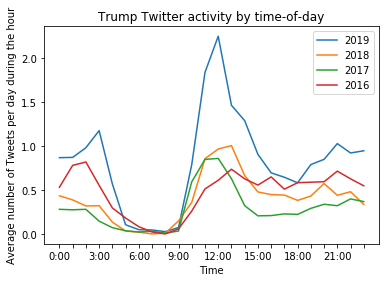

In [9]:
fig, ax = plt.subplots()
time_oclock = ['0:00', '', '', '3:00', '', '',
               '6:00', '', '', '9:00', '', '',
               '12:00', '', '', '15:00', '', '',
               '18:00', '', '', '21:00', '', '',]

x_pos = np.arange(len(time_oclock))

ax.plot(x_pos, num_tweets_per_day_2019, label="2019")
ax.plot(x_pos, num_tweets_per_day_2018, label="2018")
ax.plot(x_pos, num_tweets_per_day_2017, label="2017")
ax.plot(x_pos, num_tweets_per_day_2016, label="2016")

ax.set_xticks(x_pos)
ax.set_xticklabels(time_oclock)

ax.set_xlabel('Time')
ax.set_ylabel('Average number of Tweets per day during the hour')
ax.set_title('Trump Twitter activity by time-of-day')
ax.legend()
plt.savefig("Trump_Twitter_activity.jpeg", dpi=200)

plt.show()

In [10]:
source2freq = {}

for t in data:
    if t['source'] in source2freq:
        source2freq[t['source']] += 1
    else:
        source2freq[t['source']] = 1

print(source2freq)

print('The percentage of iphone tweets in the dataset is ' + str(source2freq['Twitter for iPhone']/len(data)))
print('The percentage of Android tweets in the dataset is ' + str(source2freq['Twitter for Android']/len(data)))
print('The percentage of web tweets in the dataset is ' + str(source2freq['Twitter Web Client']/len(data)))

{'Twitter for iPhone': 14187, 'Twitter Media Studio': 125, 'Twitter Web App': 4, 'Twitter Web Client': 12182, 'Twitter for iPad': 60, 'Media Studio': 156, 'Twitter Ads': 97, 'Twitter for Android': 14545, 'Periscope': 7, 'TweetDeck': 483, 'Instagram': 133, 'Mobile Web (M5)': 56, 'Twitter Mirror for iPad': 1, 'Twitter QandA': 10, 'Facebook': 105, 'Twitter for BlackBerry': 97, 'Neatly For BlackBerry 10': 5, 'Twitter for Websites': 1, 'Twitlonger': 23, 'Vine - Make a Scene': 10, 'TwitLonger Beta': 405}
The percentage of iphone tweets in the dataset is 0.33231050313876137
The percentage of Android tweets in the dataset is 0.3406961491614354
The percentage of web tweets in the dataset is 0.2853462006933383


{'2015': {'Iphone': 411, 'Android': 5180}, '2016': {'Iphone': 1958, 'Android': 1835}, '2017': {'Iphone': 2103, 'Android': 281}, '2018': {'Iphone': 3494, 'Android': 0}, '2019': {'Iphone': 6211, 'Android': 0}}


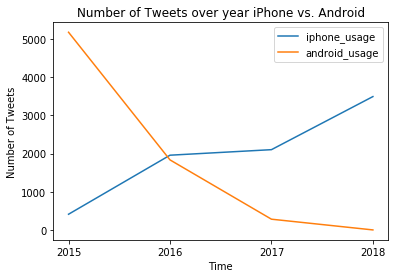

In [11]:
# 2015 : {}
import collections
source2freq = {'2015':{'Iphone': 0,
                       'Android': 0},
               '2016':{'Iphone': 0,
                       'Android': 0},
               '2017':{'Iphone': 0,
                       'Android': 0},
               '2018':{'Iphone': 0,
                       'Android': 0},
               '2019':{'Iphone': 0,
                       'Android': 0}}

for twitter in data:
    year, hour = convert2year_hour(twitter['created_at'])
    if year == '2015' or year == '2016' or year == '2017' or year == '2018' or year == '2019':
        if twitter['source'] == 'Twitter for iPhone':
            source2freq[year]['Iphone'] += 1
        elif twitter['source'] == 'Twitter for Android':
            source2freq[year]['Android'] += 1
            
print(source2freq)

iphone_usage = [source2freq['2015']['Iphone'],
                source2freq['2016']['Iphone'],
                source2freq['2017']['Iphone'],
                source2freq['2018']['Iphone']]

android_usage = [source2freq['2015']['Android'],
                 source2freq['2016']['Android'],
                 source2freq['2017']['Android'],
                 source2freq['2018']['Android']]

fig, ax = plt.subplots()

years = ['2015', '2016', '2017', '2018']

x_pos = np.arange(len(years))

ax.plot(x_pos, iphone_usage, label="iphone_usage")
ax.plot(x_pos, android_usage, label="android_usage")

ax.set_xticks(x_pos)
ax.set_xticklabels(years)

ax.set_xlabel('Time')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets over year iPhone vs. Android')
ax.legend()

plt.savefig("iphonevsandroid_over_time.jpeg", dpi=200)
plt.show()

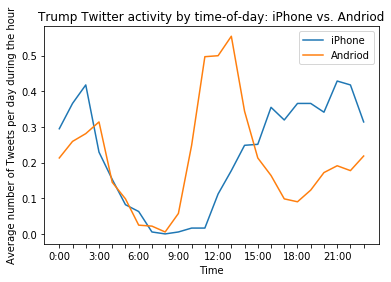

In [12]:
# record each years number of tweets for each hour per day
num_tweets_2016_iphone = [0] * 24
num_tweets_2016_android = [0] * 24

for twitter in data:
    year, hour = convert2year_hour(twitter['created_at'])
    if year == '2016':
        if twitter['source'] == 'Twitter for iPhone':
            num_tweets_2016_iphone[int(hour)] += 1
        elif twitter['source'] == 'Twitter for Android':
            num_tweets_2016_android[int(hour)] += 1


# get average number of tweets per day
iphone_num_tweets_per_day_2016 = [x / 366 for x in num_tweets_2016_iphone]
android_num_tweets_per_day_2016 = [x / 366 for x in num_tweets_2016_android]


fig, ax = plt.subplots()
time_oclock = ['0:00', '', '', '3:00', '', '',
               '6:00', '', '', '9:00', '', '',
               '12:00', '', '', '15:00', '', '',
               '18:00', '', '', '21:00', '', '',]

x_pos = np.arange(len(time_oclock))

ax.plot(x_pos, iphone_num_tweets_per_day_2016, label="iPhone")
ax.plot(x_pos, android_num_tweets_per_day_2016, label="Andriod")

ax.set_xticks(x_pos)
ax.set_xticklabels(time_oclock)

ax.set_xlabel('Time')
ax.set_ylabel('Average number of Tweets per day during the hour')
ax.set_title('Trump Twitter activity by time-of-day: iPhone vs. Andriod')
ax.legend()
plt.savefig("difference_ip_ad.jpeg", dpi=200)
plt.show()

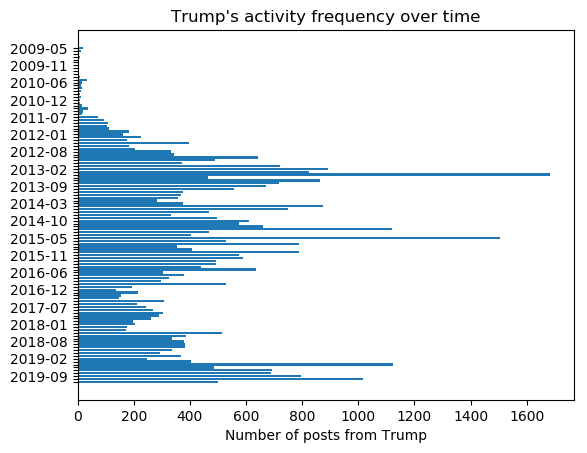

In [13]:
def convertTimeStamp(gmt_time_stamp):
    time_parts = gmt_time_stamp.split(" ")
    print(time_parts)
    date_str = time_parts[5] + '-' + month2num[time_parts[1]] + '-' + time_parts[2]
    time_str = time_parts[3]
    
    return date_str + ' ' + time_str

def convert2year_month(gmt_time_stamp):
    time_parts = gmt_time_stamp.split(" ")    
    return time_parts[5] + '-' + month2num[time_parts[1]]

year_months = []

for twitter in data:    
    year_months.append(convert2year_month(twitter['created_at']))
    
activities_over_time = collections.Counter(year_months).most_common()
activities_over_time.sort(key = lambda x : x[0])

plt.rcdefaults()
fig, ax = plt.subplots()

time_stamps = [activities_over_time[i][0] if i % 6 == 0 else '' for i in range(len(activities_over_time))]
y_pos = np.arange(len(time_stamps))
freqs = [x[1] for x in activities_over_time]

ax.barh(y_pos, freqs, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(time_stamps)
ax.invert_yaxis()
ax.set_xlabel('Number of posts from Trump')
ax.set_title('Trump\'s activity frequency over time' )
plt.savefig("frequency_over_time.jpeg", dpi=200)

plt.show()

3 Interaction Analysis: Retweet and Mention

We are curious to see the people Donald cares about on Twitter.

In [14]:
retweet_num = 0
retweet_accounts = []

# the eda would be in you know and you know you 

for twitter in data:
    if twitter['is_retweet']:
        retweet_num += 1
        retweet_accounts.append(twitter['retweet_account'])

print("Retweet acoounts for " + str(retweet_num/len(data)) + " percent of Donald Trump's Tweets")

Retweet acoounts for 0.07575189731097161 percent of Donald Trump's Tweets


As we can see around 7.5% of Donald's tweet are from retweet, which shows that Donald still wrote most of his tweets by himself.

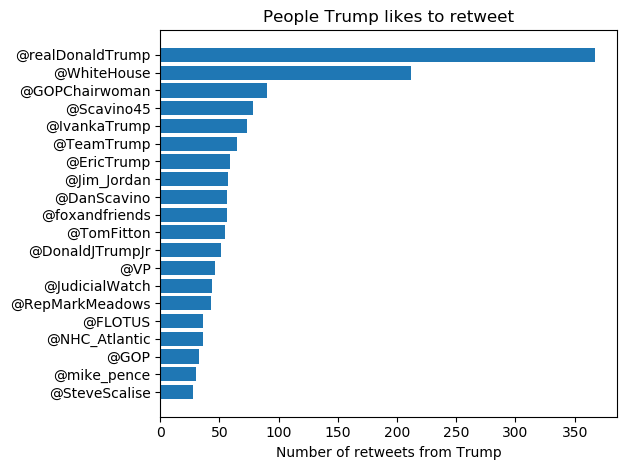

In [15]:
retweet_account2freq = collections.Counter(retweet_accounts)

most_common_accounts = retweet_account2freq.most_common(20)

plt.rcdefaults()
fig, ax = plt.subplots()

accounts = [x[0] for x in most_common_accounts]
y_pos = np.arange(len(accounts))
freqs = [x[1] for x in most_common_accounts]

ax.barh(y_pos, freqs, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(accounts)
ax.invert_yaxis()
ax.set_xlabel('Number of retweets from Trump')
ax.set_title('People Trump likes to retweet')
plt.tight_layout()

plt.savefig("retweets.jpeg", dpi=200)

plt.show()


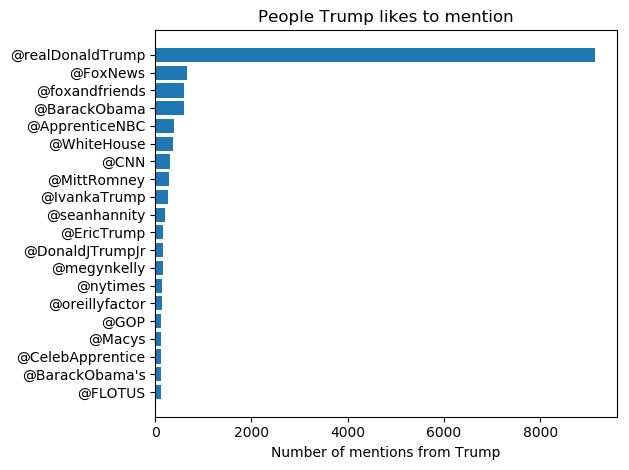

[('@realDonaldTrump', 9127), ('@FoxNews', 671), ('@foxandfriends', 603), ('@BarackObama', 590), ('@ApprenticeNBC', 391), ('@WhiteHouse', 362), ('@CNN', 317), ('@MittRomney', 277), ('@IvankaTrump', 269), ('@seanhannity', 195), ('@EricTrump', 164), ('@DonaldJTrumpJr', 152), ('@megynkelly', 152), ('@nytimes', 146), ('@oreillyfactor', 133), ('@GOP', 131), ('@Macys', 129), ('@CelebApprentice', 127), ("@BarackObama's", 125), ('@FLOTUS', 120)]


In [16]:
MENTION_PATTERN = re.compile(r'@\w*')
mentioned_accounts = []
for twitter in data:
    for word in twitter['tokenized_text']:
        if (re.match(MENTION_PATTERN, word) != None):
            mentioned_accounts.append(word)
            
most_common_mentioned_accounts = collections.Counter(mentioned_accounts).most_common(20)

plt.rcdefaults()
fig, ax = plt.subplots()

accounts = [x[0] for x in most_common_mentioned_accounts]
y_pos = np.arange(len(accounts))
freqs = [x[1] for x in most_common_mentioned_accounts]

ax.barh(y_pos, freqs, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(accounts)
ax.invert_yaxis()
ax.set_xlabel('Number of mentions from Trump')
ax.set_title('People Trump likes to mention')
plt.tight_layout()

plt.savefig("mentions.jpeg", dpi=200)

plt.show()
print(most_common_mentioned_accounts)

4 language analysis

We would like to see the lingusitc pattern of Trump. To make the result more accurate, we only count the original tweet written by Donald in this analysis.

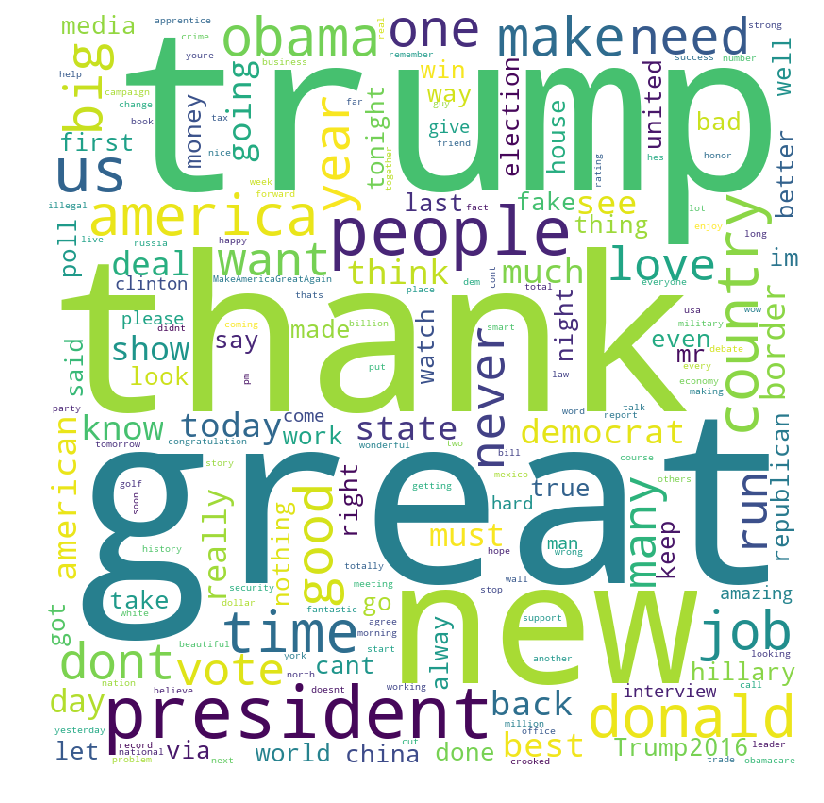

In [17]:
words = []
for twitter in data:
    if not twitter['is_retweet']:
        words += twitter['processed_text']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, collocations=False).generate(' '.join(words)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.savefig("word_cloud.jpeg", dpi=200)
plt.show()

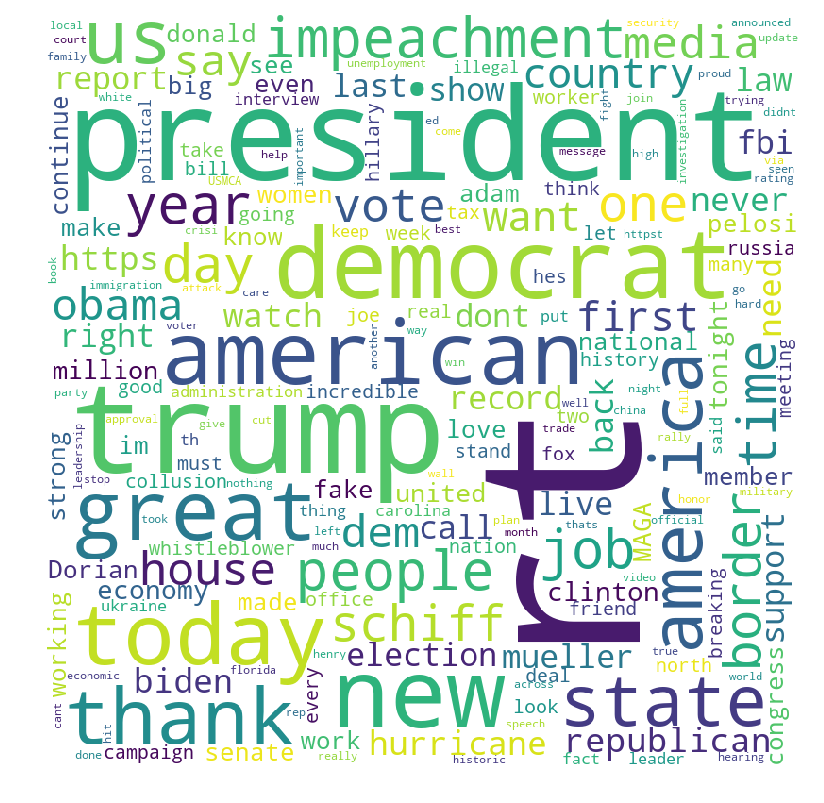

In [18]:
words = []
for twitter in data:
    if twitter['is_retweet']:
        words += twitter['processed_text']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, collocations=False).generate(' '.join(words)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [19]:
# how many grammer mistake did trump usage?

def get_misspelling_set():
    misspelling_set = set()
    with open("data/misspelling.txt", 'r') as f:
        for idx, row in enumerate(f):            
            mis_spelled_word = row.split("->")[0]
            misspelling_set.add(mis_spelled_word)
            
    return misspelling_set

misspelling_set = get_misspelling_set()

42692
105


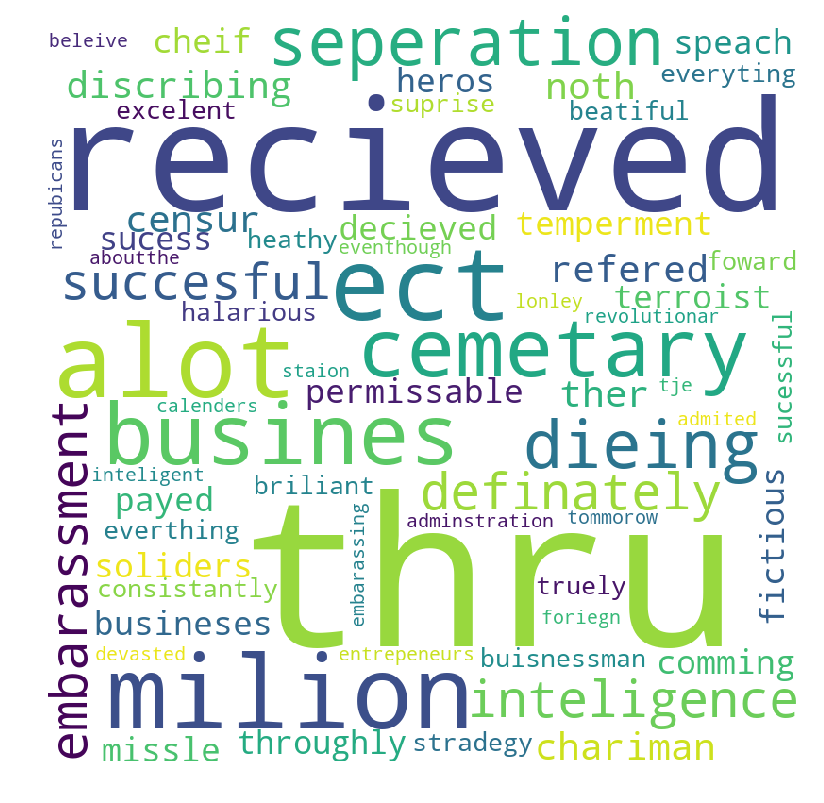

['noth', 'recieved', 'refered', 'censur', 'thru', 'ther', 'discribing', 'recieved', 'chariman', 'busines', 'permissable', 'soliders', 'cemetary', 'cheif', 'terroist', 'thru', 'seperation', 'seperation', 'cemetary', 'missle', 'dieing', 'heros', 'thru', 'recieved', 'busineses', 'recieved', 'decieved', 'thru', 'speach', 'recieved', 'recieved', 'payed', 'temperment', 'recieved', 'thru', 'comming', 'fictious', 'throughly', 'sucess', 'thru', 'consistantly', 'thru', 'briliant', 'inteligence', 'thru', 'dieing', 'embarassment', 'suprise', 'recieved', 'inteligence', 'everthing', 'everyting', 'beatiful', 'alot', 'heathy', 'alot', 'excelent', 'buisnessman', 'ect', 'ect', 'stradegy', 'halarious', 'foward', 'definately', 'sucessful', 'thru', 'definately', 'truely', 'thru', 'thru', 'entrepeneurs', 'tommorow', 'recieved', 'beleive', 'thru', 'thru', 'ect', 'eventhough', 'busines', 'succesful', 'foriegn', 'lonley', 'embarassing', 'thru', 'embarassment', 'tje', 'succesful', 'thru', 'aboutthe', 'inteligen

In [20]:
num_mis = 0

trump_misspelling = []

for twitter in data:
    words = twitter['processed_text']
    
    for word in words:
        if word in misspelling_set:
            num_mis += 1
            trump_misspelling.append(word)

print(len(data))
print(num_mis)


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, collocations=False).generate(' '.join(trump_misspelling)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.savefig("misspelling.jpeg", dpi=200)

plt.show()
print(trump_misspelling)